# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [42]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [43]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/SemanaTEC - Analitica"

else:
    # Define path del proyecto
    Ruta            = ""

# url string that hosts our .csv file
url = '/content/drive/MyDrive/SemanaTEC - Analitica/Iris.csv'

# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [44]:
# Print dataset
dataset.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [45]:
# Print dataset shape
dataset.shape


(151, 5)

In [46]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [47]:
# Drop na
dataset = dataset.dropna()
dataset.shape

(151, 5)

3. Encoding the class label categorical column: from string to num


In [48]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["Flower"] = dataset["Flower"].map(species_mapping)

#Visualize the dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,NaN
1,5.1,3.5,1.4,0.2,0.0
2,4.9,3.0,1.4,0.2,0.0
3,4.7,3.2,1.3,0.2,0.0
4,4.6,3.1,1.5,0.2,0.0


Now the label/category is numeric


4. Discard columns that won't be used


In [49]:
# Drop out non necesary columns
dataset = dataset.iloc[1:]


5. Scatter plot of the data

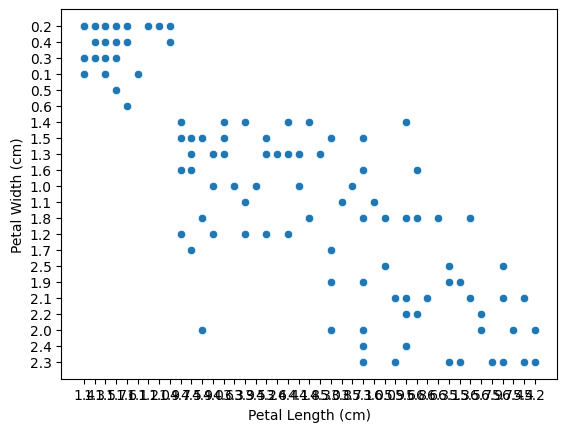

In [50]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(x="Petal_Length", y="Petal_Width", data=dataset)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()



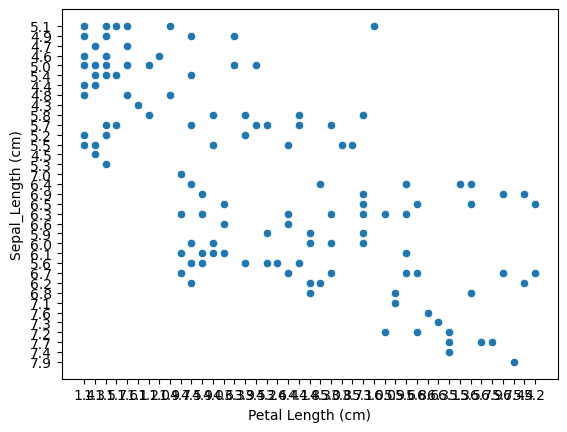

In [51]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(x="Petal_Length", y="Sepal_Length", data=dataset)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Sepal_Length (cm)")
plt.show()



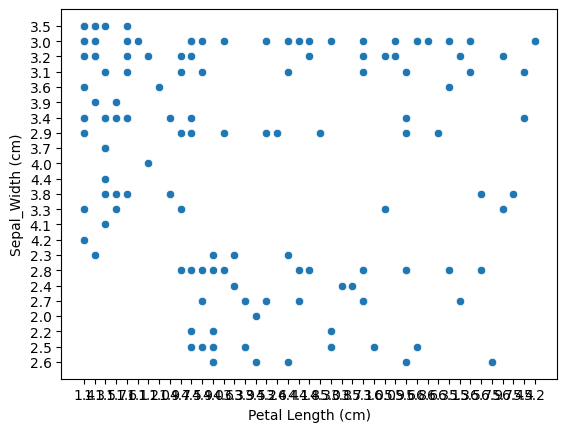

In [52]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(x="Petal_Length", y="Sepal_Width", data=dataset)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Sepal_Width (cm)")
plt.show()



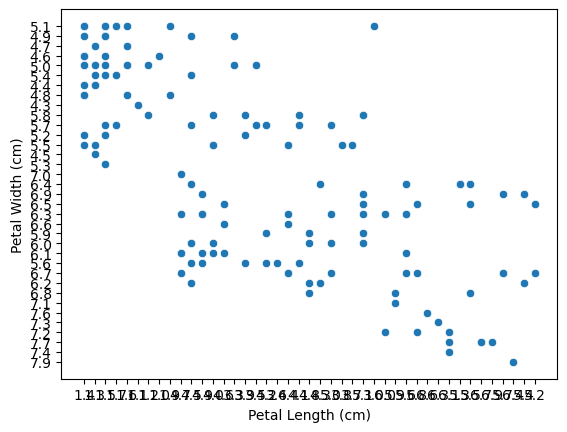

In [53]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(x="Petal_Length", y="Sepal_Length", data=dataset)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()



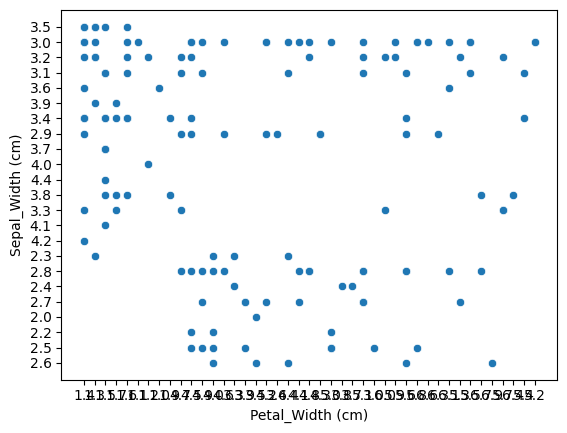

In [54]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(x="Petal_Length", y="Sepal_Width", data=dataset)
plt.xlabel("Petal_Width (cm)")
plt.ylabel("Sepal_Width (cm)")
plt.show()



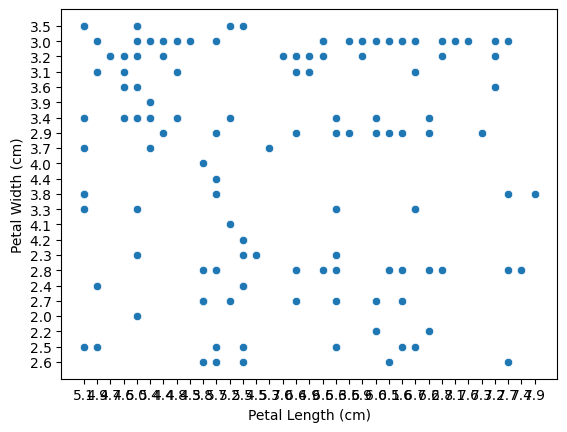

In [55]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(x="Sepal_Length", y="Sepal_Width", data=dataset)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()



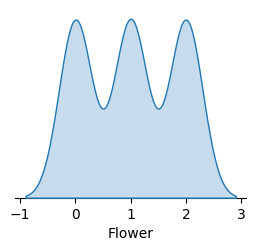

In [56]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset, diag_kind='kde', corner=True)
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [57]:
# Get dataframes for each real cluster
df_setosa = dataset[dataset['Flower'] == 0]
df_versicolor = dataset[dataset['Flower'] == 1]
df_virginica = dataset[dataset['Flower'] == 2]


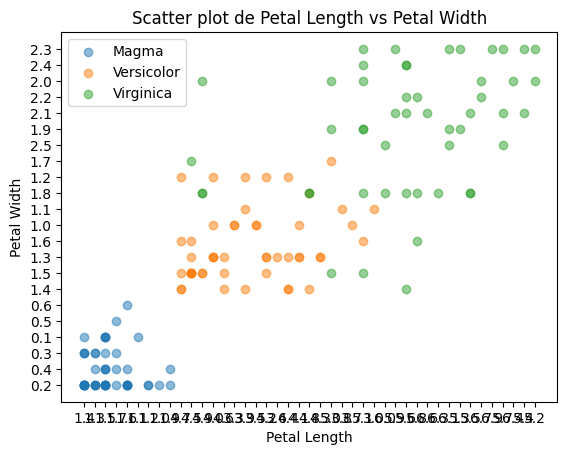

In [58]:
# Scatter plot of each real cluster for Petal
plt.scatter(df_setosa['Petal_Length'], df_setosa['Petal_Width'], label='Magma', alpha=0.5)
plt.scatter(df_versicolor['Petal_Length'], df_versicolor['Petal_Width'], label='Versicolor', alpha=0.5)
plt.scatter(df_virginica['Petal_Length'], df_virginica['Petal_Width'], label='Virginica', alpha=0.5)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot de Petal Length vs Petal Width')
plt.legend()
plt.show()



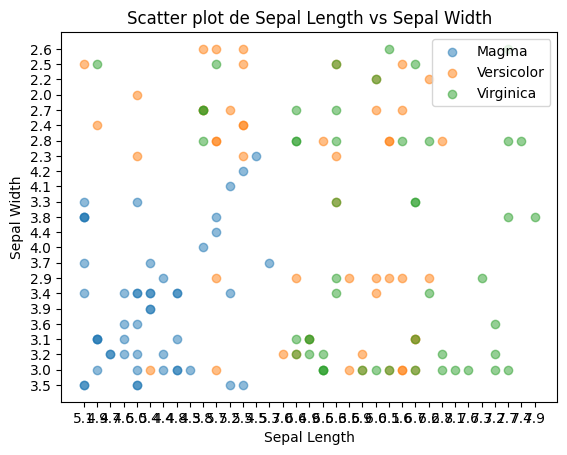

In [59]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df_setosa['Sepal_Length'], df_setosa['Sepal_Width'], label='Magma', alpha=0.5)
plt.scatter(df_versicolor['Sepal_Length'], df_versicolor['Sepal_Width'], label='Versicolor', alpha=0.5)
plt.scatter(df_virginica['Sepal_Length'], df_virginica['Sepal_Width'], label='Virginica', alpha=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot de Sepal Length vs Sepal Width')
plt.legend()
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [60]:
# Select variables (one, two, three, four)
x  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#x  = dataset[["Petal_Length", "Petal_Width"]].values
#x  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [61]:
# Understand the data X
x

array([['5.1', '3.5', '1.4', '0.2'],
       ['4.9', '3.0', '1.4', '0.2'],
       ['4.7', '3.2', '1.3', '0.2'],
       ['4.6', '3.1', '1.5', '0.2'],
       ['5.0', '3.6', '1.4', '0.2'],
       ['5.4', '3.9', '1.7', '0.4'],
       ['4.6', '3.4', '1.4', '0.3'],
       ['5.0', '3.4', '1.5', '0.2'],
       ['4.4', '2.9', '1.4', '0.2'],
       ['4.9', '3.1', '1.5', '0.1'],
       ['5.4', '3.7', '1.5', '0.2'],
       ['4.8', '3.4', '1.6', '0.2'],
       ['4.8', '3.0', '1.4', '0.1'],
       ['4.3', '3.0', '1.1', '0.1'],
       ['5.8', '4.0', '1.2', '0.2'],
       ['5.7', '4.4', '1.5', '0.4'],
       ['5.4', '3.9', '1.3', '0.4'],
       ['5.1', '3.5', '1.4', '0.3'],
       ['5.7', '3.8', '1.7', '0.3'],
       ['5.1', '3.8', '1.5', '0.3'],
       ['5.4', '3.4', '1.7', '0.2'],
       ['5.1', '3.7', '1.5', '0.4'],
       ['4.6', '3.6', '1.0', '0.2'],
       ['5.1', '3.3', '1.7', '0.5'],
       ['4.8', '3.4', '1.9', '0.2'],
       ['5.0', '3.0', '1.6', '0.2'],
       ['5.0', '3.4', '1.6', '0.4'],
 

In [62]:
# Understand the data y
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [63]:
# Calculate the number of observations in the dataset
num_observations = x.shape[0]
num_observations


150

In [64]:
# Calculate the number of observations for class 0
num_class_0 = np.sum(y == 0)
num_class_0


50

In [65]:
# Calculate the number of observations for class 1
num_class_1 = np.sum(y == 1)
num_class_1


50

In [66]:
# Calculate the number of observations for class 2
num_class_2 = np.sum(y == 2)
num_class_2


50

# Train a classifier

## Train the classification model

In [67]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Initialize the classifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

## Predict the class of a new observation

In [68]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [69]:
# Make the prediction using xnew
predicted_class = classifier.predict(xnew)

# Get the predicted class
print(predicted_class)


[0.]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [70]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [71]:
# Number of observations in the train set
num_train_observations = x_train.shape[0]
num_train_observations


105

In [72]:
# Number of observations of each class in the train set
num_class_0_train = np.sum(y_train == 0)
num_class_1_train = np.sum(y_train == 1)
num_class_2_train = np.sum(y_train == 2)

num_class_0_train, num_class_1_train, num_class_2_train


(31, 37, 37)

In [73]:
# Number of observations in the test set
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Train the classification model

In [74]:
# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
classifier.fit(x_train, y_train)




RandomForestClassifier(random_state=42)

## Test the classification model

In [75]:
# Make the predictions using the test set
y_pred = classifier.predict(x_test)


In [76]:
# Explore real and predicted labels
comparison_df = pd.DataFrame({'Real Label': y_test, 'Predicted Label': y_pred})

comparison_df


,Real Label,Predicted Label
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


## Compute the acurracy

In [77]:
# Define a function to compute accuracy
def accuracy(real, predicted):
    return np.mean(real == predicted)

In [78]:
# Calculate total accuracy
total_accuracy = accuracy(y_test, y_pred)
total_accuracy




1.0

In [79]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
total_accuracy_sklearn = accuracy_score(y_test, y_pred)
total_accuracy_sklearn

1.0

In [80]:
# Compute accuracy for class 0
accuracy_class_0 = accuracy(y_test[y_test == 0], y_pred[y_test == 0])
accuracy_class_0


1.0

In [81]:
# Compute accuracy for class 1
accuracy_class_1 = accuracy(y_test[y_test == 1], y_pred[y_test == 1])
accuracy_class_1


1.0

In [82]:
# Compute accuracy for class 2
accuracy_class_2 = accuracy(y_test[y_test == 2], y_pred[y_test == 2])
accuracy_class_2

1.0

## Confussion matrix

In [83]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# se normaliza la matriz de confusion
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(cm)
print(cm_norm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


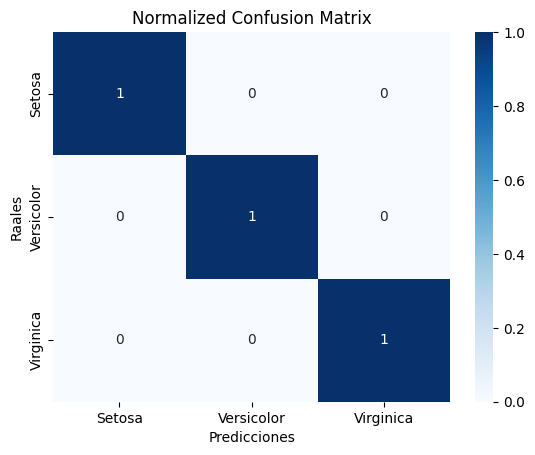

In [84]:
# Plot normalized confussion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Prediction')
plt.ylabel('Raal')
plt.title('Normalized Confusion Matrix')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?
Four Variables (Sepal Length, Sepal Width, Petal Length, Petal Width): Achieved 100% accuracy in classifying all three flower types (Setosa, Versicolor, Virginica).
Two Petal Variables (Petal Length, Petal Width): Also achieved 100% accuracy in classifying all three flower types.
Two Sepal Variables (Sepal Length, Sepal Width): Resulted in a lower overall accuracy of 73%. While it perfectly classified Setosa (100% accuracy), it had lower accuracy for Versicolor (46.15%) and Virginica (61.54%).


2) Using the four variables, try with two classifiers. Which provides the best performance?
Both the Random Forest and Logistic Regression classifiers achieved 100% accuracy when using all four variables.
